In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Collect the data 

In [32]:
house_prices = pd.read_csv(r'C:\Users\muham\OneDrive\Projects\House prices and economics\cleaned data (csv)\House_price_csv_mode.csv')
unemployment_rate = pd.read_csv('https://raw.githubusercontent.com/HAZCHEM234/NZ_House_labor_market_data/main/Clean%20data/Unemployment_index.csv')
immigration_rate = pd.read_csv(r'C:\Users\muham\OneDrive\Projects\House prices and economics\cleaned data (csv)\clean_immigration.csv')
rental_market = pd.read_csv('https://raw.githubusercontent.com/HAZCHEM234/NZ_House_labor_market_data/main/Clean%20data/rental_index.csv')

### Clean the data to make it find average and sum yearly values for Housing data

In [33]:
# Convert the Date column to datetime format
house_prices['Date'] = pd.to_datetime(house_prices['Date'], dayfirst=True)

# Extract the year from the Date column
house_prices['Year'] = house_prices['Date'].dt.year

# Filter for years 2022, 2023, and 2024
filtered_data = house_prices[house_prices['Year'].isin([2018, 2019, 2020, 2021, 2022, 2023, 2024])]

# Group by year and calculate the appropriate metrics
summary = filtered_data.groupby('Year').agg({
    'House Sale': 'sum',
    'House price index (HPI)': 'mean',
    'Total value of housing stock ': 'sum',
    'Residential investment (GDP)': 'mean'
}).reset_index()

# Print the summary
summary

,Year,House Sale,House price index (HPI),Total value of housing stock,Residential investment (GDP)
0,2018,96260,2493.50,4393203,3837.50
1,2019,97225,2560.50,4603916,4041.00
2,2020,110783,2834.50,5122392,3921.75
3,2021,107593,3624.50,6530693,4260.75
4,2022,70078,3639.75,6643052,4226.00
5,2023,72753,3399.75,6349287,4053.50
6,2024,18603,3467.00,1630738,3647.00


### Clean the data to make it find average and sum yearly values for unemployment rate data

In [34]:
# Convert the Date column to datetime format
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'], dayfirst=True)

# Extract the year from the Date column
unemployment_rate['Year'] = unemployment_rate['Date'].dt.year

# Filter for years 2023 and 2024
filtered_unemployment = unemployment_rate[unemployment_rate['Year'].isin([2018, 2019, 2020, 2021, 2022, 2023, 2024])]

# Group by year and calculate the median
summary_unemployment = filtered_unemployment.groupby('Year').agg({
    'Unemployment rate': 'median'
}).reset_index()

# Print the summary
summary_unemployment

,Year,Unemployment rate
0,2018,4.35
1,2019,4.10
2,2020,4.55
3,2021,3.65
4,2022,3.30
5,2023,3.75
6,2024,4.30


In [35]:
# Convert the Date column to datetime format
immigration_rate['Date'] = pd.to_datetime(immigration_rate['Date'], dayfirst=True)

# Extract the year from the Date column
immigration_rate['Year'] = immigration_rate['Date'].dt.year

# Filter for rows where citizenship and visa are "TOTAL"
filtered_immigration = immigration_rate[
    (immigration_rate['citizenship'] == 'TOTAL') &
    (immigration_rate['visa'] == 'TOTAL')&
    (immigration_rate['country_of_residence'] == 'TOTAL')
]

# Filter for years 2022, 2023, and 2024
filtered_immigration = filtered_immigration[filtered_immigration['Year'].isin([2018, 2019, 2020, 2021, 2022, 2023, 2024])]

# Group by year and calculate the sum of estimate and median of standard_error
summary_immigration = filtered_immigration.groupby('Year').agg({
    'estimate': 'sum',
    'standard_error': 'median'
}).reset_index()

# Print the summary
summary_immigration

,Year,estimate,standard_error
0,2018,139014,0.0
1,2019,165742,0.0
2,2020,91444,0.0
3,2021,55459,0.0
4,2022,162509,0.0
5,2023,244764,164.5
6,2024,60407,391.0


In [36]:
import pandas as pd

# Load the data
rental_market = pd.read_csv('https://raw.githubusercontent.com/HAZCHEM234/NZ_House_labor_market_data/main/Clean%20data/rental_index.csv')

# Convert the Date column to datetime format
rental_market['Date'] = pd.to_datetime(rental_market['Date'], dayfirst=True)

# Extract the year from the Date column
rental_market['Year'] = rental_market['Date'].dt.year

# Filter for 'National' in the 'City or Nation' column and years 2018-2023
filtered_rental = rental_market[
    (rental_market['City or Nation'] == 'National') &
    (rental_market['Year'].between(2018, 2023))
]

# Group by year and calculate the median of the DATA_VAL
summary_rental = filtered_rental.groupby('Year').agg({
    'DATA_VAL': 'median'
}).reset_index()

# Print the summary
(summary_rental)


,Year,DATA_VAL
0,2018,1433.5
1,2019,1483.5
2,2020,1518.5
3,2021,1570.0
4,2022,1640.0
5,2023,1696.5


In [37]:
# Merge the DataFrames on 'Year'
merged_df = pd.merge(summary_unemployment, summary, on='Year')
merged_df = pd.merge(merged_df, summary_immigration, on='Year')

# Print the merged DataFrame
merged_df

,Year,Unemployment rate,House Sale,House price index (HPI),Total value of housing stock,Residential investment (GDP),estimate,standard_error
0,2018,4.35,96260,2493.50,4393203,3837.50,139014,0.0
1,2019,4.10,97225,2560.50,4603916,4041.00,165742,0.0
2,2020,4.55,110783,2834.50,5122392,3921.75,91444,0.0
3,2021,3.65,107593,3624.50,6530693,4260.75,55459,0.0
4,2022,3.30,70078,3639.75,6643052,4226.00,162509,0.0
5,2023,3.75,72753,3399.75,6349287,4053.50,244764,164.5
6,2024,4.30,18603,3467.00,1630738,3647.00,60407,391.0


In [38]:
merged_df.to_csv('merged_data.csv', index=False)


### Chart to identify the trends

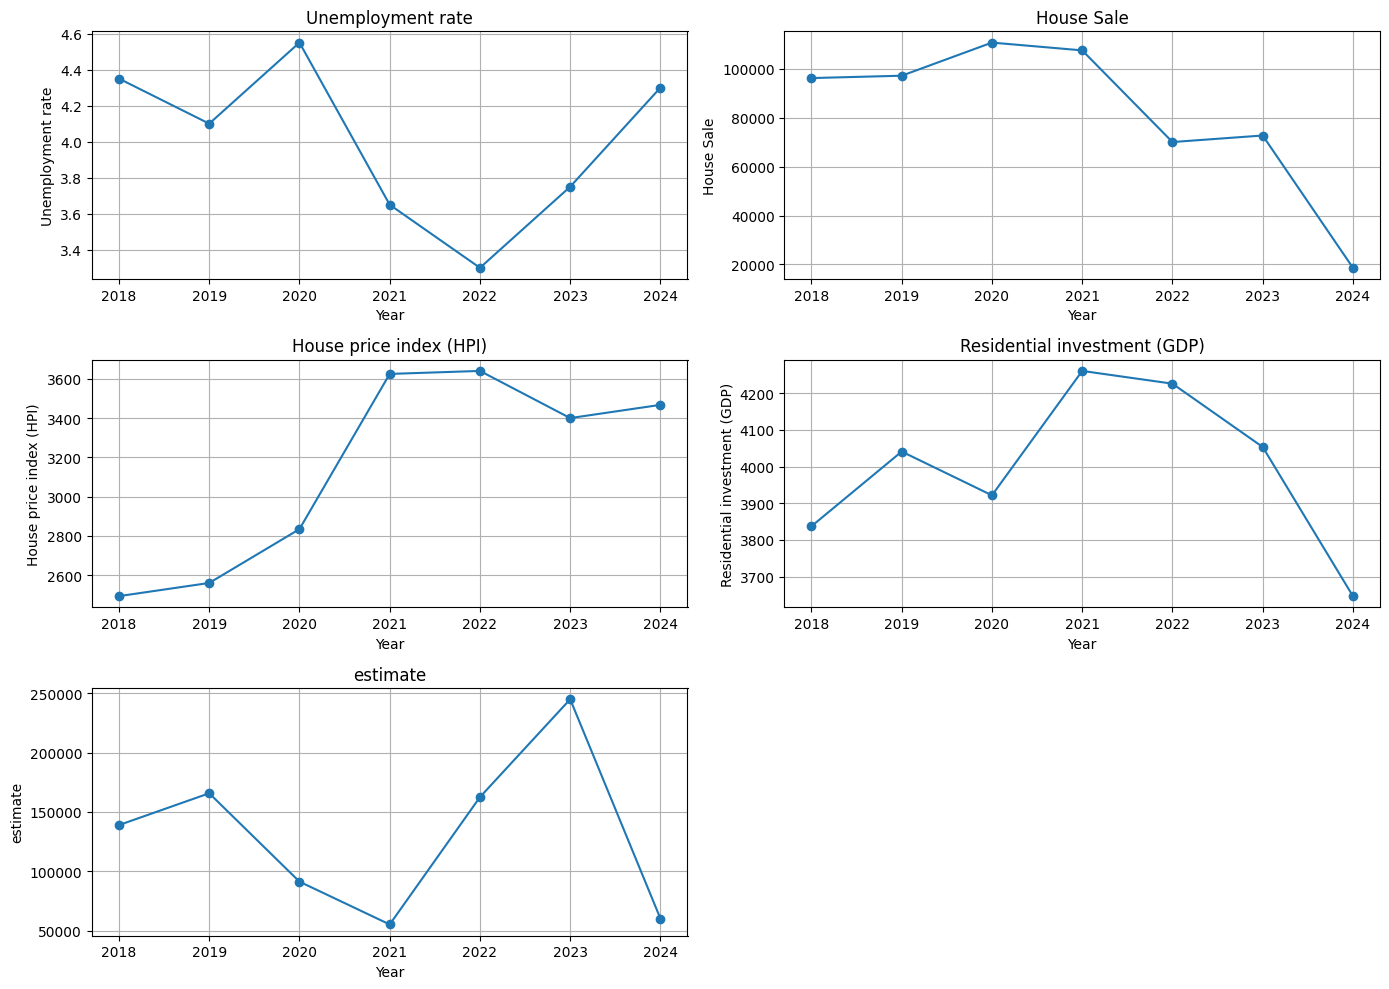

In [39]:
df = pd.DataFrame(merged_df)

# Plot each metric separately
metrics = [
    "Unemployment rate", 
    "House Sale", 
    "House price index (HPI)", 
    "Residential investment (GDP)",
    "estimate"
]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    plt.plot(df["Year"], df[metric], marker='o', label=metric)
    plt.title(metric)
    plt.xlabel("Year")
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Scatter plot to identify the correlation

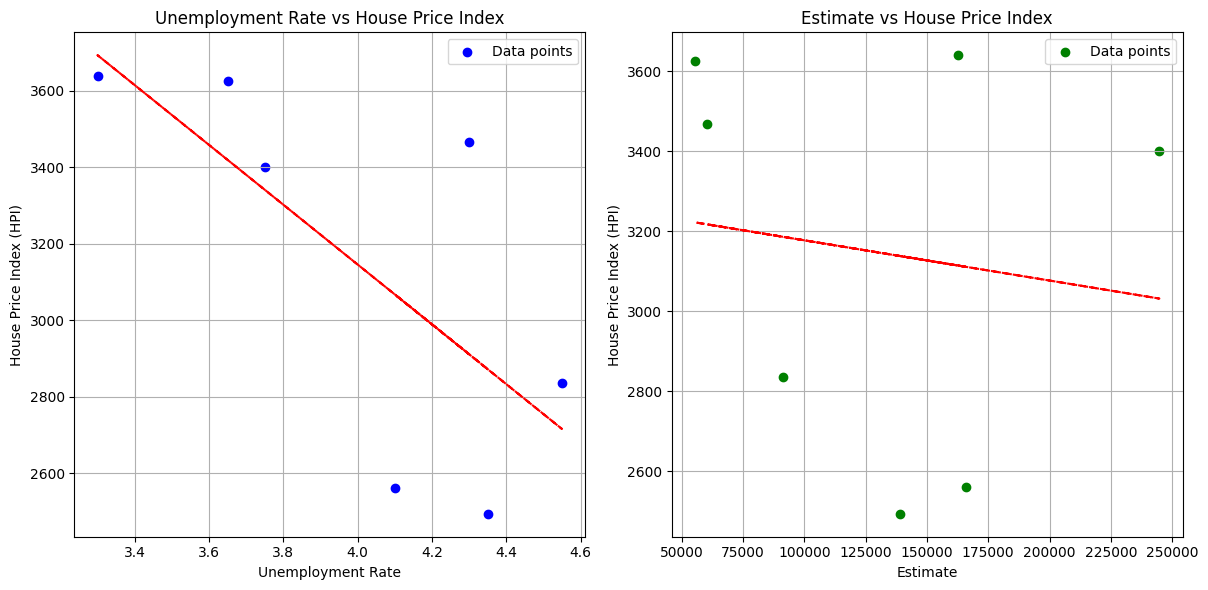

In [40]:
# Function to add a trendline
def add_trendline(ax, x, y):
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), linestyle='--', color='red')

plt.figure(figsize=(18, 6))

# Scatter plot: Unemployment rate vs House price index
plt.subplot(1, 3, 1)
plt.scatter(df["Unemployment rate"], df["House price index (HPI)"], color='blue', label='Data points')
add_trendline(plt, df["Unemployment rate"], df["House price index (HPI)"])
plt.title("Unemployment Rate vs House Price Index")
plt.xlabel("Unemployment Rate")
plt.ylabel("House Price Index (HPI)")
plt.grid(True)
plt.legend()

# Scatter plot: Estimate vs House price index
plt.subplot(1, 3, 2)
plt.scatter(df["estimate"], df["House price index (HPI)"], color='green', label='Data points')
add_trendline(plt, df["estimate"], df["House price index (HPI)"])
plt.title("Estimate vs House Price Index")
plt.xlabel("Estimate")
plt.ylabel("House Price Index (HPI)")
plt.grid(True)
plt.legend()



plt.tight_layout()
plt.show()

# Correlation Analaysis

Use correlation to explore relationship between variables

* Correlation Analysis: Review the heatmap and correlation coefficients to identify strong relationships.
* Regression Analysis: Check the R-squared value to understand how well the model explains the variability in house prices. Review the coefficients to interpret the impact of each predictor.

In [51]:
df = merged_df

# Calculate correlation matrix
correlation_matrix = df[['Unemployment rate', 'House price index (HPI)', 'estimate']].corr()

# Display correlation matrix
correlation_matrix



,Unemployment rate,House price index (HPI),estimate
Unemployment rate,1.000000,-0.698164,-0.334455
House price index (HPI),-0.698164,1.000000,-0.135876
estimate,-0.334455,-0.135876,1.000000


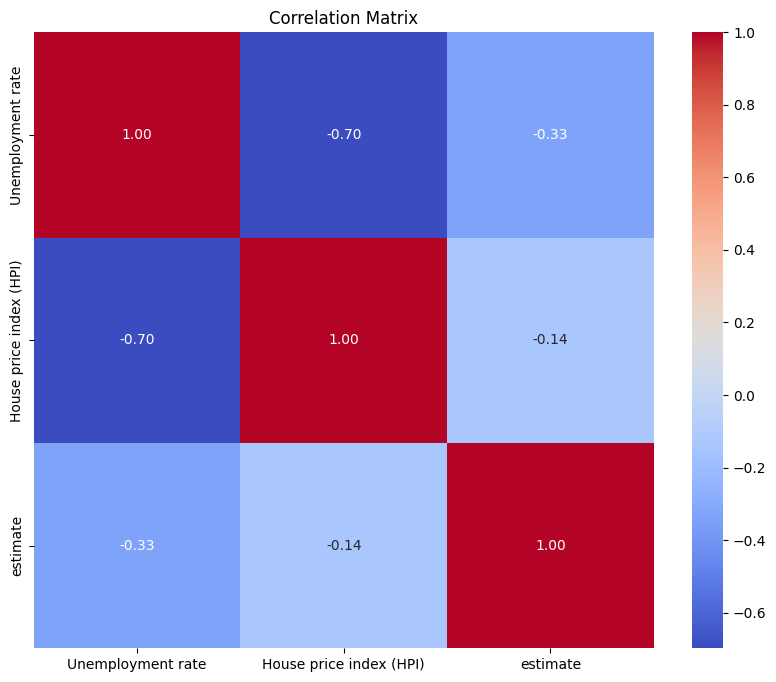

In [52]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Regression Analysis

Perform multiple regression to understand the impact of unemployment and immigration on the house price

Mean Squared Error: 45388.86
R-squared: 0.79
Coefficients: [-9.01675382e+02 -2.86357397e-03 -6.03662322e-03]
Intercept: 7622.824548510072


Text(0.5, 1.0, 'Actual vs Predicted HPI')

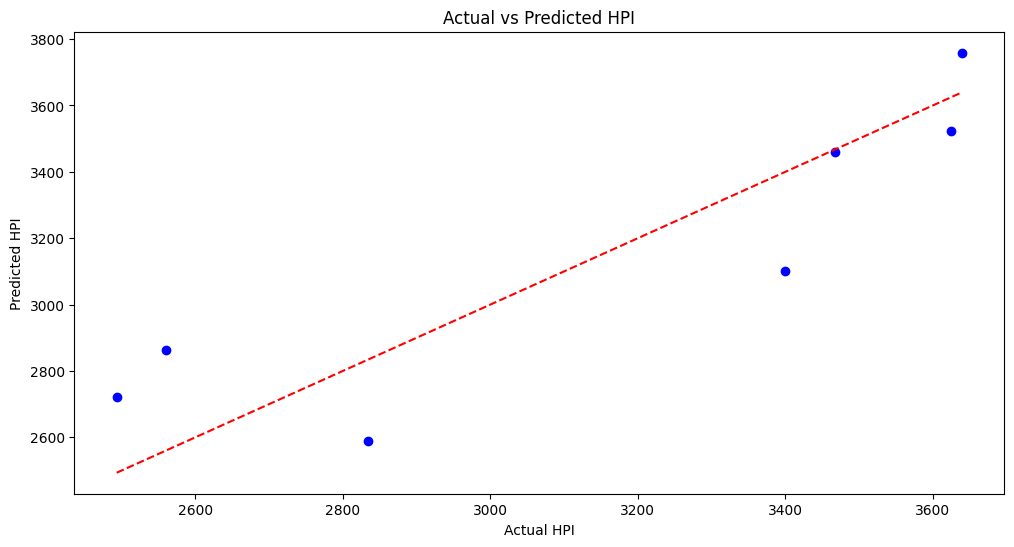

In [53]:
# Prepare data for regression
X = df[['Unemployment rate', 'estimate', 'House Sale']] # train model = unemployment rate, immigration and house sale
y = df['House price index (HPI)']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot regression results
plt.figure(figsize=(12, 6))


plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual HPI')
plt.ylabel('Predicted HPI')
plt.title('Actual vs Predicted HPI')



Actual vs. Predicted HPI

* Scatter Plot: Each point represents the actual vs. predicted house price index.
*  Red Line: Ideal predictions (actual equals predicted).
* Interpretation: Points close to the line indicate accurate predictions. Your model performs well, but there's some scatter, suggesting room for improvement

Mean Squared Error (MSE)
* Value: 45,603.52
* Interpretation: This indicates the average squared difference between actual and predicted house price indices. Lower MSE suggests more accurate predictions.

R-squared
* Value: 0.79
* Interpretation: The model explains 79% of the variability in house prices, indicating a strong fit.

Coefficients
* Unemployment Rate Coefficient: -902.81
* A 1% increase in unemployment rate decreases the house price index by about 902.81.

* Estimate Coefficient: -0.000978
* For each unit increase in estimate, the house price index decreases by 0.000978.

* House Sale Coefficient: -0.00596
* Each additional house sale reduces the house price index by 0.00596.

Intercept
* Value: 7620.14
* Interpretation: The baseline house price index when all other variables are zero.

Plot Interpretation
* Actual vs. Predicted HPI: Points close to the red line indicate accurate predictions. The scatter around the line suggests some variability not captured by the model.
* The model is performing well, but some scatter suggests that further improvements could be made, possibly by exploring additional variables or transformations.

Mean Squared Error: 45388.86
R-squared: 0.79
Coefficients: [-9.01675382e+02 -2.86357397e-03 -6.03662322e-03]
Intercept: 7622.824548510072


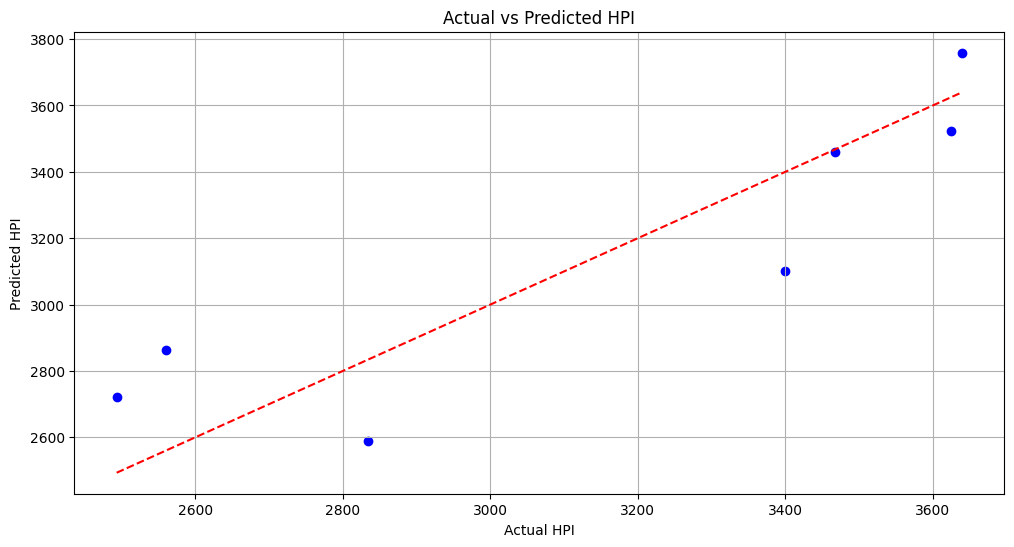

In [43]:
# Prepare data for regression
X = df[['Unemployment rate', 'estimate', 'House Sale']]
y = df['House price index (HPI)']

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display coefficients
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Plot regression results
plt.figure(figsize=(12, 6))

# Plot actual vs predicted house price index
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual HPI')
plt.ylabel('Predicted HPI')
plt.title('Actual vs Predicted HPI')
plt.grid(True)
plt.show()